In [1]:
include("tools.jl");

WebIO._IJuliaInit()

  Activating project at `~/gits/ApxThyApp/nb`


# MATH 522 Numerical Analysis 

Christoph Ortner, ortner@math.ubc.ca, University of British Columbia

A course on approximation theory and with focus on computational aspects and applications. 


# § 0. Introduction and Motivation

## § 0.1 Composite Trapezoidal Rule

Consider two functions defined on $[-\pi, \pi]$,
$$
	f_1(x) = \frac{1}{1 + x^2}, \qquad
	f_2(x) = \frac{1}{1 + \sin^2(x)}
$$

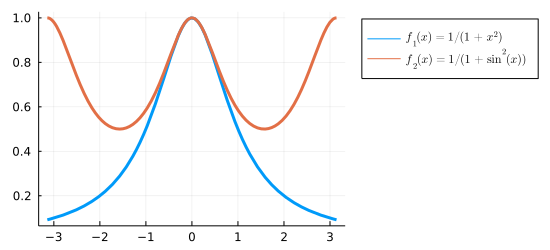

In [2]:
f1(x) = 1 / (1 + x^2)
f2(x) = 1 / (1 + sin(x)^2)
plot(f1, -π, π, lw=3, label = L"f_1(x) = 1/(1+x^2)")
plot!(f2, -π, π, lw = 3, label = L"f_2(x) = 1/(1+\sin^2(x))",
      size = (550, 250), legend = :outertopright )


We approximate the integral $I[f_j] := \int_{-\pi}^\pi f_j(x) \,dx$ with a quadrature rule, the [composite trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule)
$$
\begin{aligned}
	I[f] \approx I_N[f] := \sum_{n = -N+1}^N \frac{2\pi}{2N}
		\cdot \frac{f(x_{n-1})) + f(x_n)}{2}
\end{aligned}
$$
where $x_n = 2\pi n / (2N) = \pi n/N, n = -N, \dots, N$ are the quadrature nodes.

If $f \in C^1$ then it is not too difficult to show that on each sub-interval $(x_{n-1}, x_n)$ of length $h \approx 1/N$ approximating $f$ with a piecewise affine function yields an $O(h^2)$ error and therefore the total error is expected to also scale like $h^2 \approx N^{-2}$, i.e., we expect that
$$
  |I[f] - I_N[f]| \lesssim N^{-2}
$$

To test this numerically we implement the quadrature rule rewritten as follows:
$$
I_N[f] = \frac{\pi}{2N} \big(f(-\pi) + f(\pi)\big)
         + \frac{\pi}{N} \sum_{n = -N+1}^{N-1} f(\pi n/N)
$$

In [3]:
@doc raw"""
`trapezoidal_rule(f, N)` : composite trapezoidal rule on [-π, π], 
```math
I_N[f] = \frac{\pi}{2N} \big(f(-\pi) + f(\pi)\big)
         + \frac{\pi}{N} \sum_{n = -N+1}^{N-1} f(\pi n/N)
```

* `f` : function defining the integrand
* `N` : number of integration nodes is ``2N+1``
* Output: value for composite trapezoidal rule
"""
trapezoidal_rule(f, N) =  (
            0.5*π/N * (f(-π) + f(π))
            + π/N * sum( f(n*π/N) for n = -N+1:N-1 )  );

### Convergence Trapezoidal rule

* $I_N[f]$ : trapezoidal rule approximation with $2N+1$ quadrature points
* $E_N[f] := |I_N[f] - \int_{-\pi}^\pi f(x) \,dx |$ : error

In [4]:
NN = 3:3:30       # number of quadrature points N means 2N+1 points
I1 = 2 * atan(π)  # exact value of ∫ f₁
I2 = √2 * π       # exact value of ∫ f₂
I1N = trapezoidal_rule.(f1, NN)   # trapezoidal rule approximations
I2N = trapezoidal_rule.(f2, NN)
E1N = abs.(I1N .- I1)   # errors
E2N = abs.(I2N .- I2)
ata_table( (NN, "N", "%d"),
           (I1N, "IN[f₁]", "%1.5f"),
           (E1N, "EN[f₁]", "%1.1e"),
           (I2N, "IN[f₂]", "%1.5f"),
           (E2N, "EN[f₂]", "%1.1e"), )

|   N |  IN[f₁] |  EN[f₁] |  IN[f₂] |  EN[f₂] |
| ---:| -------:| -------:| -------:| -------:|
|   3 | 2.53130 | 6.0e-03 | 4.48799 | 4.5e-02 |
|   6 | 2.52287 | 2.4e-03 | 4.44311 | 2.3e-04 |
|   9 | 2.52418 | 1.1e-03 | 4.44288 | 1.1e-06 |
|  12 | 2.52465 | 6.1e-04 | 4.44288 | 5.8e-09 |
|  15 | 2.52487 | 3.9e-04 | 4.44288 | 2.9e-11 |
|  18 | 2.52498 | 2.7e-04 | 4.44288 | 1.5e-13 |
|  21 | 2.52506 | 2.0e-04 | 4.44288 | 8.9e-16 |
|  24 | 2.52510 | 1.5e-04 | 4.44288 | 0.0e+00 |
|  27 | 2.52513 | 1.2e-04 | 4.44288 | 8.9e-16 |
|  30 | 2.52516 | 9.7e-05 | 4.44288 | 0.0e+00 |


But plotting the error will give us a more qualitative view ...

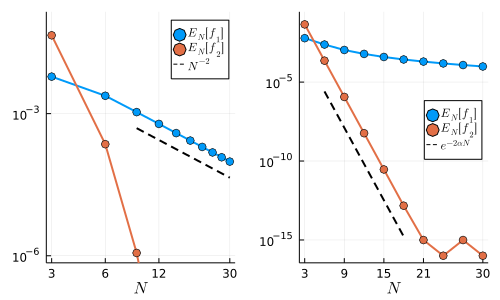

In [5]:
Px = plot(NN, E1N, label = L"E_N[f_1]", yaxis = :log10,
          lw=2, m=:o, ms=4, 
          xticks = [3, 9, 15, 21, 30] )
plot!(NN, E2N .+ 1e-16, label = L"E_N[f_2]",
      xlabel = L"N", lw=2, m=:o, ms=4)
P1 = plot!(deepcopy(Px), NN[3:end], 0.04*NN[3:end].^(-2), 
           lw=2, ls=:dash,c=:black, label = L"N^{-2}", 
           ylims = [1e-6, 1e-1],  xaxis = :log10, 
           xticks = ([3, 6, 12, 30], ["3", "6", "12", "30"]))
P2 = plot!(Px, NN[2:6], 0.1*exp.(- 2 * log(1 + sqrt(2)) * NN[2:6]), lw=2,
            c=:black, ls = :dash, label = L"e^{- 2 \alpha N}", 
            legend = :right, ylims = [1e-16, 1e-1])
# alpha = log(sqrt(2)+1)
plot(P1, P2, size = (500, 300))


An unexpected outcome? By the end of the first part of this course we should
be able to explain this result.


## §0.2 What is Approximation Theory

[Wikipedia:](https://en.wikipedia.org/wiki/Approximation_theory) In mathematics, approximation theory is concerned with how functions can best be approximated with simpler functions, and with quantitatively characterizing the errors introduced thereby. Note that what is meant by best and simpler will depend on the application.

For the purpose of computational mathematics we should start by asking what operations are available to us on a computer: +, -, *, /. Everything else must be built from those. This means that the only functions we can implement immediately are polynomials and rational functions: 
$$
	p_N(x) = a_0 + a_1 x + \dots + a_N x^N, \qquad r_{NM}(x) = \frac{p_N(x)}{q_M(x)}
$$
We could (maybe should?) build this entire course based on polynomials. Instead, I decided to use trigonometric polynomials; more on this in the next notebook.

In any programming language, including Julia which we are using in this course, when you call mathematical functions such as 
```julia
exp, cos, sin, acos, log, ...
```
you are in fact evaluating a rational approximant that approximates this function to within machine precision (typically $\epsilon \approx 10^{-16}$ for 64bit floating point accuracy).


Beyond implementing special functions, why should we approximate a general function $f$ by a polynomial (or other classes of simple functions)? There are many reasons, e.g., 
* $f$ might be expensive to evaluate, hence replacing it with a cheap but accurate "surrogate" $p_N$ would give us computationally efficient access to $f$
* $f$ might be unknown, but we know it solves some equation, e.g. a PDE, $L[f] = 0$. We may be able to construct an approximate equation for a polynomial $L_N[p_N] = 0$ and prove that solving this implies $p_N \approx f$.
* $f$ might be unknown but we have some observations (data) about it. We might then "fit" a polynomial $p_N$ to this data in order to infer further information about $f$. 
* In "pure mathematics", a polynomial or other approximation may be easier to analyze to extract properties of some function that are difficult to obtain directly.

What implicit or explicit assumptions are we making in these tasks? How should we optimize our approximation parameters (the polynomial degree $N$ in this case). What can we say about the accuracy of approximation, i.e. how close is $p_N$ to $f$? How can we optimally sample $f$ to obtain good approximations? These are the kind of questions that approximation theory and numerical analysis are concerned with.


## §0.3 Resources

### Julia

* https://julialang.org
* https://juliaacademy.com
* https://juliadocs.github.io/Julia-Cheat-Sheet/

Although you won't need it for this course, I recommend VS Code for serious work with Julia (unless you are already committed to another very good editor such as Emacs, Vim, Sublime etc. Atom is still a good choice but most development has now moved to VS Code.

### Jupyter notebooks 

Julia supports Jupyter notebooks via the [`IJulia.jl`](https://github.com/JuliaLang/IJulia.jl) kernel. To install it, simply start a Julia REPL, switch to the package manager by typeing `]` and then run `add IJulia`. From the Julia REPL, the Jupyter server can be started via `using IJulia; IJulia.notebook()`. 

Alternatively, from the terminal, switch to the folder where the jupyter notebooks are stored, and then run 
```
julia -e 'using IJulia; IJulia.notebook(; dir = ".")'
```

To run (or write) interactive notebook cells we need [`Interact.jl`](). This is a nice feature of Jupyter notebooks, but not strictly required to study for the course, and definitely not for any assignments or projects. I have found this non-trivial to install. Please follow the instructions in the [`Interact.jl` README](https://github.com/JuliaGizmos/Interact.jl#getting-started).

### Pluto notebooks

In an earlier version of this course I used Pluto notebooks which have some advantages (and some disadvantages). This material can be accessed through the course github page.

* https://github.com/fonsp/Pluto.jl
* https://www.wias-berlin.de/people/fuhrmann/SciComp-WS2021/assets/nb01-first-contact-pluto.html
* https://computationalthinking.mit.edu/Spring21/

### Course Material

* https://github.com/cortner/ApxThyApp.git

This contains lecture notes and the Pluto and Jupyter notebooks (I will likely use Jupyter, but we will see), and my lecture notes which are still under development but at least the basic theory part is now maturing. The lecture notes also contain further references and exercises. 
